# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичаня информация данных получена. 
</div 

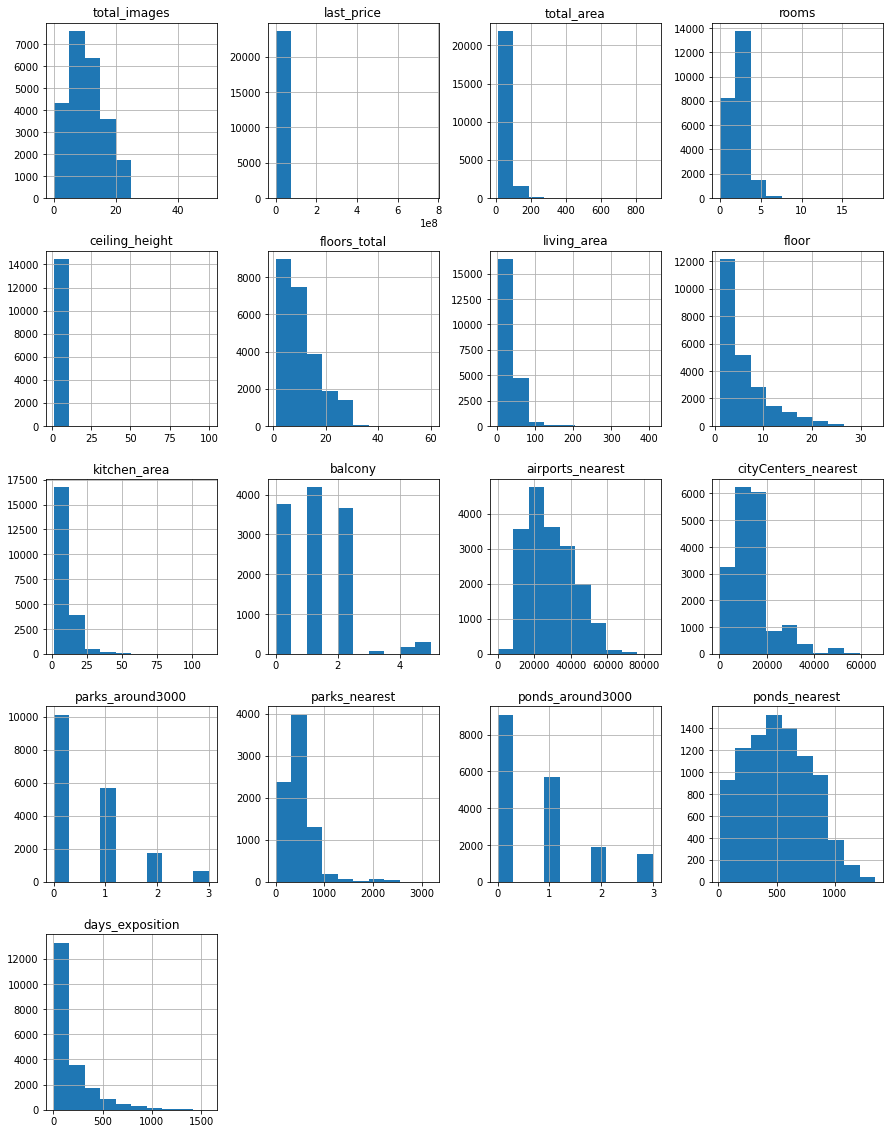

In [4]:

data.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший график вышел. По нему мы видим распределение по столбцам таблиц. 
</div 

 **Вывод**
 
 Таким образом, представлены данные по 23699 объявлениям. Присутствуют пропуски практически в каждом столбце, а также несоответствующие колонкам типы данных.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично. С информацией ознакомились и примерно прикинули дальнейший план действий. 
</div 

### Предобработка данных 

Проверяем пропуски, дубликаты и аномалии в данных:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data[['last_price','total_area','rooms','ceiling_height','floors_total','living_area','floor','kitchen_area']].describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000


   **Необходимо проверить**:
1. Наибольшие пропуски колонках: апартаменты, ближайшие парки, водоемы и балконы;
2. Огромная площадь помещения (900 кв м) и присутствие помещения с 19 комнатами;
3. Высота потолков в 1 и 100 м;
4. Здание с 60-ю этажами.

Меняем тип данных для столбца с датами публикации на datetime:

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Перевод столбца в формат даты сделан верно. 
</div 

Округляем данные в столбцах с ценой, площадью, а также заменим пропуски в days_exposition на 0.
Заменим тип данных чтобы удобнее было в дальнейшем работать с данными показателями:

In [9]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

Убираем аномалии для высоты потолка в 1, 1.2, 1.75 и 100 метров. Также рассмотрим высоту потолков, которая превышает 5 метров. 

In [10]:
data = data.query('ceiling_height != [1.2, 1.75, 1, 100]')
data.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
3148,14,2900000,75,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,0
3474,3,1400000,30,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125
4643,0,4300000,45,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
4876,7,3000000,25,2017-09-27,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28
5076,0,3850000,30,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7
5246,0,2500000,54,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540
5669,4,4400000,50,2017-08-08,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000,80,2019-01-09,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5863,20,5650000,45,2018-08-15,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14


Встречаются показатели 27, 29, 22, 35 метров. 
 Скорее всего данные ошибки были совершены при заполнении, а именно упущены разделители между цифрами при заполнении. Это вполне реально, если учесть, что в типовых советских домах есть соответствующие показатели в 2.7, 2.9, 3.5 метров; 
 Высота потолков 8 и 10 метров может подходить для двухуровневых квартир. Поэтому лучше заполнить высоту медианным значением.

In [11]:
data.ceiling_height.median()

2.65

In [12]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = 2.7

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Логично, соглашусь. 
</div 

Посмотрим сколько представлено зданий выше 42 этажей. Это обясняется тем, что 2019 года самым высоким зданием Санкт-Петербурга и Ленинградской области был "Лидер Тауэр" с аналогичной этажностью.

In [14]:
data.query('floors_total > 42')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166
16731,9,3978000,40,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45


Всего две записи с данной этажностью, можно исключить:

In [15]:
data = data.query('floors_total != [52, 60]')

Заполняем пропуски в столбце с балконами. Можно предположить, что владельцы не указывали число балконов и-за отсутствия таковых, поэтому пропуски заменяем на 0:

In [16]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь все верно. 
</div 

Аналогичная ситуация с апартаментами, только пропуски заменяем на False, так как в столбце должны быть булевым тип данных:

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')


Также заполним пропуски в площади кухни медианными значениями, а также поменяем тип данных:

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()).astype(int)


Перед тем, как заполнить пропуски в столбце с жилой площадью, необходимо просмотреть корреляцию между числом комнат и жилой площадью:

In [19]:
data['living_area'].corr(data['rooms'])

0.845961187537528

Прослеживается высокая корреляция. Создадим сводную таблицу с медианными значениями жилой площади от количества комнат, чтобы в дальнейшем заполнить пропуки в жилой площади:

In [20]:
room_area_pivot = data.pivot_table(index='rooms', values='living_area', aggfunc=['median'])
room_area_pivot.columns = ['median']
room_area_pivot

,median
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


Также создаем функцию, с помощью которой заменим пропуски в столбце с жилой площадью.

In [21]:
def living_area(new_data, room_area_pivot):
    for r, m in room_area_pivot['median'].items(): 
        new_data.loc[(new_data.loc[:, 'rooms']== r) &(new_data.loc[:, 'living_area'].isnull()), 'living_area' ] = m
living_area(data, room_area_pivot)        
data['living_area'] = data['living_area'].astype(int)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот, прям классно получилось. 
</div 

Удалим строки с пропусками с названиями населенного пункта и количество этажей в доме, поскольку данные пропуски проблематично заполнить.

In [22]:
data.dropna(subset=['floors_total'], inplace = True)
data.dropna(subset=['locality_name'], inplace = True)

Также просмотрим уникальные значения в столбце с названиями населенных пунктов:

In [23]:
data['locality_name'].unique()  

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В представленном списке разное написание слова "поселок". Устраним:

In [24]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно простой и понятный метод замены. 
</div 

Также необходимо заменить тип данных в столбце с количеством этажей на int, так как представлены целые числа:

In [25]:
data['floors_total'] = data['floors_total'].astype('int')

Просмотрим исправленные данные:

In [26]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,False,False,11,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,False,False,False,9,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,False,False,9,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,False,False,False,14,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155
7,5,7915000,71,2019-04-18,2,2.65,24,30,22,False,False,False,18,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0
8,20,2900000,33,2018-05-23,1,2.65,27,15,26,False,False,False,8,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23559 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23559 non-null  int64         
 1   last_price            23559 non-null  int64         
 2   total_area            23559 non-null  int64         
 3   first_day_exposition  23559 non-null  datetime64[ns]
 4   rooms                 23559 non-null  int64         
 5   ceiling_height        23559 non-null  float64       
 6   floors_total          23559 non-null  int64         
 7   living_area           23559 non-null  int64         
 8   floor                 23559 non-null  int64         
 9   is_apartment          23559 non-null  bool          
 10  studio                23559 non-null  bool          
 11  open_plan             23559 non-null  bool          
 12  kitchen_area          23559 non-null  int64         
 13  balcony         

**Вывод**
1. Сделали столбец с датами читабельным, заменив тип данных;
2. Округлили данные в столбцах с ценой, площадью;
3. Убрали аномалии и пропуски в столбце с высотой потолка, заменив на медианные;
4. Заполнили пропуски в жилой площади с учетом корреляции с количеством комнат;
5. Заменили пропуски в столбце с балконами на 0, предположив, что владельцы не указали количество балконов из-за их отсутствия.
Всего было удалено 140 строк, что составляет 0.5% от числа первоначальных данных, то есть не повлияет на ход исследования.

NB! Часть пропусков не удалось устранить, в таких столбцах, как близость к центру, парку, водоему, поскольку нет возможности провести корреляцию и аналогичных показателей для устранения пропусков.
Также пропуски не устранены в столбце с количеством дней размещения объявления, так как  нет информации о том, были ли сняты объявления на момент выгрузки данных. Скорее всего объявления были еще размещены.




<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хорошо, структурно и логично. 
</div 

### Посчитайте и добавьте в таблицу новые столбцы

Добавим цену одного квадратного метра:

In [28]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).astype(int)


Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [29]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавим месяц публикации объявления:

In [30]:
data['month'] = data['first_day_exposition'].dt.month

Добавим год публикации объявления:

In [31]:
data['year'] = data['first_day_exposition'].dt.year

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно выделены временные промежутки в данных. 
</div 

Добавим тип этажа квартиры (значения — «первый», «последний», «другой»):

In [32]:
def floor_type(row):
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == total_floors:
        return 'последний'
    elif 1 < floor < total_floors:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простая, удобная и понятная функция. 
</div 

Добавим расстояние до центра города в километрах (переведем из м в км и округлим до целых значений). Поскольку в данном столбце присутствуют 5500 пропусков, то заменим их на символичные 777777, чтобы была возможность перевести данные для удобства в int:

In [33]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [34]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(7777777)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23559 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23559 non-null  int64         
 1   last_price              23559 non-null  int64         
 2   total_area              23559 non-null  int64         
 3   first_day_exposition    23559 non-null  datetime64[ns]
 4   rooms                   23559 non-null  int64         
 5   ceiling_height          23559 non-null  float64       
 6   floors_total            23559 non-null  int64         
 7   living_area             23559 non-null  int64         
 8   floor                   23559 non-null  int64         
 9   is_apartment            23559 non-null  bool          
 10  studio                  23559 non-null  bool          
 11  open_plan               23559 non-null  bool          
 12  kitchen_area            23559 non-null  int64 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Данные подготовлены и мы можем заниматься исследовательским анализом. 
</div 

### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов: площадь, цена объекта, количество комнат; высота потолков.

Построим отдельные гистограммы и применим describe для каждого из этих параметров.


count    23559.000000
mean        60.100047
std         35.671741
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

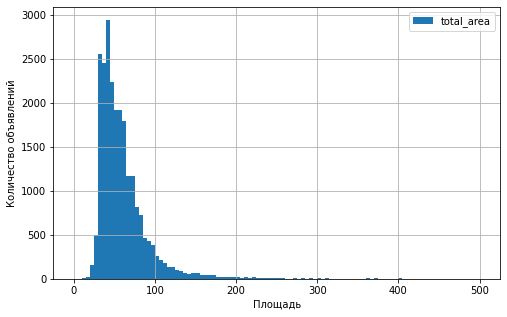

In [36]:
hist_area = data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (8,5), range = (0,500))
hist_area.set_xlabel('Площадь')
hist_area.set_ylabel('Количество объявлений')
data['total_area'].describe()

count    2.355900e+04
mean     6.540265e+06
std      1.091210e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.647000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

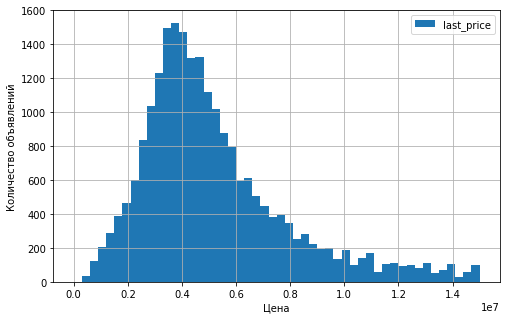

In [37]:
hist_price = data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, range = (0,15000000), figsize = (8,5))
hist_price.set_xlabel('Цена')
hist_price.set_ylabel('Количество объявлений')
data['last_price'].describe()

count    23559.000000
mean         2.070801
std          1.078660
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

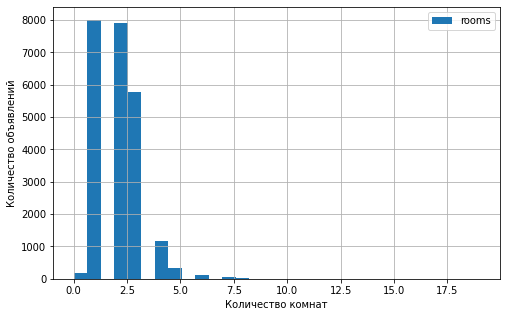

In [38]:
hist_rooms  = data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (8,5))
hist_rooms.set_xlabel('Количество комнат')
hist_rooms.set_ylabel('Количество объявлений')
data['rooms'].describe()

count    23559.000000
mean         2.697885
std          0.232127
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

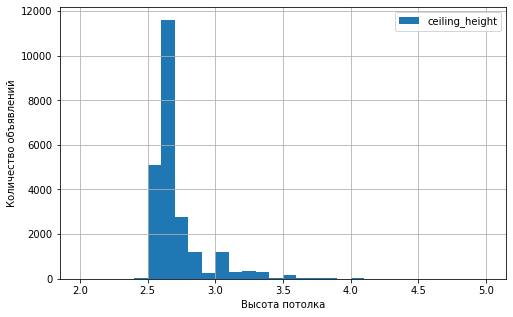

In [39]:
hist_ceiling = data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (8,5))
hist_ceiling.set_xlabel('Высота потолка')
hist_ceiling.set_ylabel('Количество объявлений')
data['ceiling_height'].describe()

**Вывод**:
1. Распределение данных нормальное, присутствуют несущественные выбросы и неадекватные значения, не влияющие на данные;
2. У площади и цены - распределение данных Гаусса;
3. Общая площадь колеблется от 12 до 900 кв.м., среднее значение - 60 кв.м., медиана - 52 кв.м. Преобладающее большинство недвижимости (межкартильный размах) между 40 и 69 кв.м.;
4. Цены в среднем  - 6.5 млн.р., медиана цен - 4.6 млн.р. Большинство объявлений в ценовом диапазоне (межкартильный размах) от 3.4 до 6.8 млн. р.;
5. Количество комнат от 1 до 19. Преобладают 1-о и 2-х комнатные квартиры;
6. Средняя высота потолка - 2.7 м, медиана  - 2.65 м. В целом преобладающее большинство недвижимости (межкартильный размах) представлено от 2.6 до 2.7 м.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классно проработано. С выводами согласен и все по графику. 
</div 

#### Изучим, как быстро продавались квартиры
Построим гистограмму, подсчитаем среднее и медиану.

Необходимо отметить, что в столбце days_exposition представлены количества дней от публикации до снятия объявления, то есть не совсем ясны причины снятия обьявления. Они могут быть как и продажа, так и другие (отзыв объявления, автоматические ограничения по срокам и тд).

Также избавимся от пустых и нулевых значений.


In [40]:
good_data = data.query('days_exposition >= 1')


In [41]:
good_data['days_exposition'].describe()

count    20388.000000
mean       180.767020
std        219.755123
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

(1.0, 1600.0)

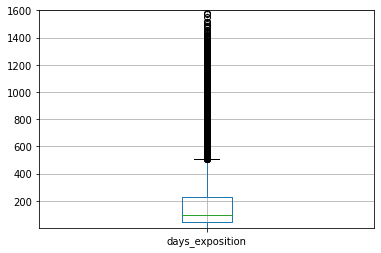

In [42]:
good_data.boxplot('days_exposition')
plt.ylim(1,1600)

<AxesSubplot:ylabel='Frequency'>

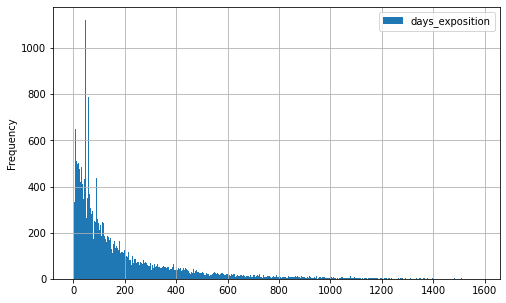

In [43]:
good_data.plot(y='days_exposition', kind='hist', bins=400, grid=True, figsize=(8, 5))

<AxesSubplot:ylabel='Frequency'>

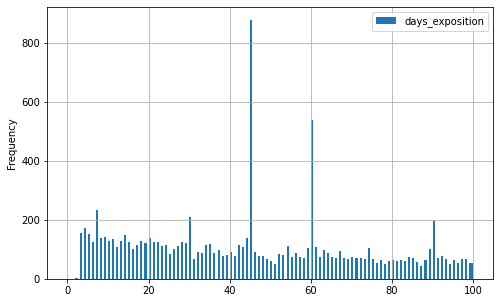

In [44]:
good_data.plot(y='days_exposition', kind='hist', bins=200, grid=True, range=(0, 100), figsize=(8, 5))


Наблюдаются выбросы на 7, 30, 45, 60 и 90 дней, которые скорее всего зависят от правил размещения объявлений(бесплатный срок и др.). Необходимо удалить их, а также заново построить гистограммы:

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хорошо, что заметил выбросы и сделал свои предположения по их поводу. 
</div 

In [45]:
good_data = good_data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')


In [46]:
good_data['days_exposition'].describe()

count    18330.000000
mean       195.734315
std        226.817540
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

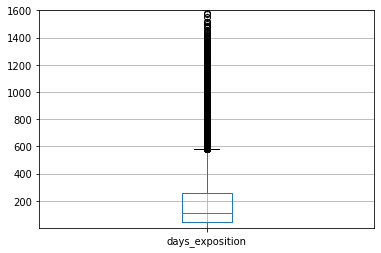

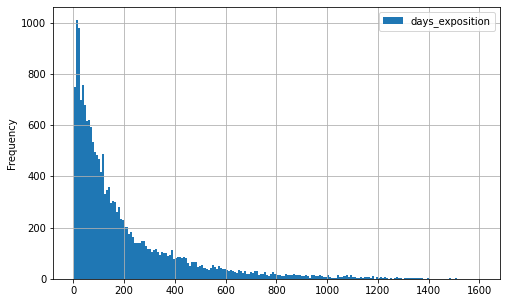

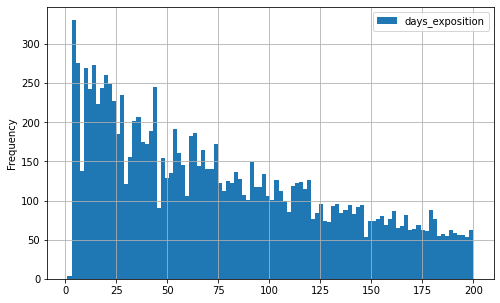

In [47]:
good_data.boxplot('days_exposition')
plt.ylim(1,1600)
good_data.plot(y='days_exposition', kind='hist', bins=200, grid=True, figsize=(8, 5), range = (1,1600))
good_data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(8, 5), range = (1,200))

**Вывод:**
1. Представлено распределение Пуассона;
2. После удаления аномалий показатели по срокам продажи квартир: среднее - 198 дней, медиана - 114 дней, межквартильный размах - от 44 до 255 дней.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно разобран график по дням в публикации. 
</div 

#### Изучим, какие факторы влияют на стоимость объекта
Посмотрим корреляцию, построим сводные таблицы, графики, которые покажут зависимость цены от параметров: площадь, количество комнат, этаж и дата размещения (день недели, месяц, год).

Сначала рассмотрим **зависимость квадратного метра от общей площади квартиры:**

In [48]:
good_data['price_per_square_meter'].corr(good_data['total_area'])

0.31172148767105656

,mean,count,median
total_area,,,
400,1907500.0,1,1907500.0
401,1000748.0,1,1000748.0
285,859649.0,1,859649.0
268,712201.0,1,712201.0
242,661090.0,1,661090.0
...,...,...,...
263,61114.0,1,61114.0
238,56911.0,1,56911.0
255,49019.0,1,49019.0


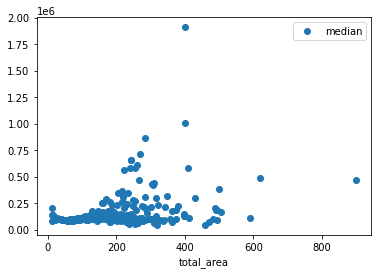

In [49]:
pivot_area_meter = good_data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_area_meter.columns = ['mean', 'count', 'median']
pivot_area_meter.plot(y = 'median', style = 'o')
pivot_area_meter.sort_values('median', ascending = False)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь ты используешь верный способ для показания зависимости. 
</div 

**Вывод:**

Корреляция между площадью квартиры и ценой за квадратный метр низкая - 0.3, но положительная, то есть чем больше площадь, тем чуть выше стоимость квадратного метра. 

Аналично проделаем с **ценой квадратного метра и количеством комнат:** 

In [50]:
good_data['rooms'].corr(good_data['price_per_square_meter'])

0.05484686690878373

,mean,count,median
rooms,,,
7,163647.627119,59,108958.0
0,109334.726804,194,106828.5
1,101398.908136,8001,100555.0
6,140767.750000,104,99708.5
5,127024.781538,325,96902.0
2,95869.178617,7894,93181.0
4,110571.209898,1172,92763.5
3,97432.296418,5779,89333.0


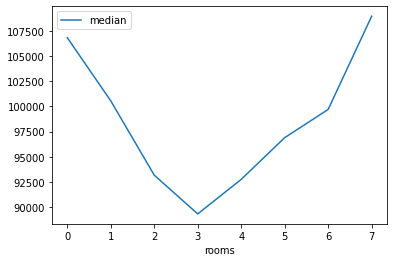

In [51]:
pivot_rooms_meter = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_rooms_meter.columns = ['mean', 'count', 'median']
pivot_rooms_meter.query('count > 50').plot(y = 'median')

pivot_rooms_meter.query('count > 50').sort_values('median', ascending = False)


**Вывод:**
1. Корреляция низкая;
2. Стоимость квадратного метра уменьшается с увеличением количества комнат до 3, после - начинает расти.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И с этим не поспоришь 
</div 

**Цена квадратного метра и этаж**:

,mean,count,median
floor_type,,,
другой,102713.594115,13595,97619
первый,81418.282028,2209,81355
последний,93645.668250,2526,88706


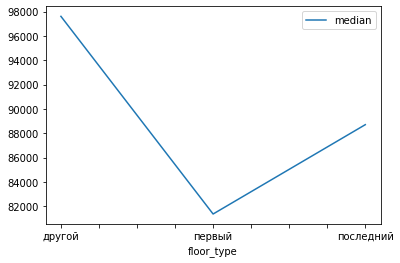

In [52]:
pivot_floor_meter = good_data.pivot_table(index = 'floor_type', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_floor_meter.columns = ['mean', 'count', 'median']
pivot_floor_meter.plot(y = 'median')
pivot_floor_meter

**Вывод:**
Самые дешевые квартиры на первом этаже, затем - на последнем, а в последнюю очередь на остальных этажах.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

**Цена квадратного метра и день размещения:**

,mean,count,median
weekday,,,
2,99214.269104,3036,95238.0
3,99534.453369,3399,95000.0
1,98789.341667,3240,94962.0
0,98944.098648,2737,94883.0
4,98282.829987,3188,94285.0
6,97250.637224,1268,93732.0
5,99681.389877,1462,93568.5


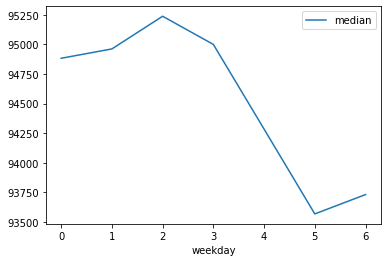

In [53]:
pivot_weekday_meter = good_data.pivot_table(index = 'weekday', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_weekday_meter.columns = ['mean', 'count', 'median']
pivot_weekday_meter.plot(y = 'median')

pivot_weekday_meter.sort_values('median', ascending = False)

**Вывод:**
1. Выставленные в среду квартиры дороже, но стоимость падает ближе к субботе, когда стоимость самая минимальная;
2. Можно предположить, что уменьшение стоимости происходит из-за низкого спроса, то есть продавцы снижают стоимость квартир. А также это можно связать с тем, что размещение объявлений происходит в начале рабочей недели.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь заметно, что выходные являются причиной просадки публикуемых объявлений. 
</div 

**Цена квадратного метра и месяц размещения:**

,mean,count,median
month,,,
8,100190.839532,1452,96449.0
1,100402.349776,1115,96250.0
9,100846.250892,1682,96026.0
11,98501.477238,1955,95238.0
2,98495.981095,2010,94915.0
10,97198.874858,1766,94444.0
7,99573.352347,1385,94363.0
12,99011.583201,1262,93889.5
3,97088.642534,1768,93750.0


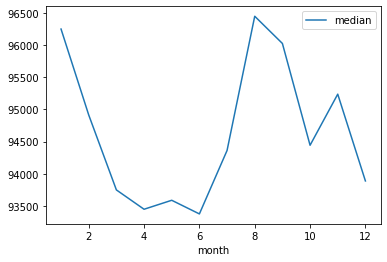

In [54]:
pivot_month_meter = good_data.pivot_table(index = 'month', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_month_meter.columns = ['mean', 'count', 'median']
pivot_month_meter.plot(y = 'median')

pivot_month_meter.sort_values('median', ascending = False)

**Вывод:**
1. Самая низкая стоимость квартир приходится на апрель - июнь;
2. Самая высокая стоимость в январе и августе, то есть невыгодные месяцы для покупки;
3. Можно предположить, что цены зависят от сезона. Снижение цен на протяжении весны и к концу декабря может зависеть от: отпусков, решения людей к релокации (студенты, например) и др.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Месяцы с большим количеством праздников тоже влияют. 
</div 

**Цена квадратного метра и год размещения:**

,mean,count,median
year,,,
2014,120448.364407,118,105477.0
2019,107268.045210,929,105000.0
2018,98228.840304,6456,96296.0
2017,97639.292618,7180,93165.5
2015,102874.666058,1096,92821.0
2016,98377.963936,2551,92187.0


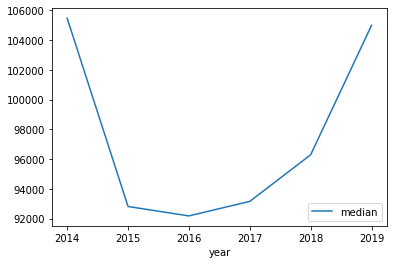

In [55]:
pivot_year_meter = good_data.pivot_table(index = 'year', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_year_meter.columns = ['mean', 'count', 'median']
pivot_year_meter.plot(y = 'median')

pivot_year_meter.sort_values('median', ascending = False)

**Вывод:**
1. Цены в среднем падали на протяжении 2014 - 2016 гг., с 2016 по 2019 гг. заметен рост до прежних позиций;
2. Можно  связать данное падение с валютным кризисом 2014 года, однако также необходимо отметить, что за 2014 год малое количество объявлений, то есть валидность выборки под сомнением. 


#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [56]:
pivot_locality_meter = good_data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
pivot_locality_meter.columns = ['count', 'mean']
pivot_locality_meter = pivot_locality_meter.sort_values('count', ascending = False).head(10)
pivot_locality_meter

,count,mean
locality_name,,
Санкт-Петербург,12353,112822.285275
поселок Мурино,499,86150.563126
поселок Шушары,358,78418.555866
Всеволожск,305,68934.265574
Пушкин,283,103192.455830
Колпино,273,75466.509158
деревня Кудрово,265,92762.973585
поселок Парголово,261,90266.011494
Гатчина,241,67613.248963


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 составлен. 
</div 

Населенный пункт с самой высокой стоимостью квадратного метра:

In [57]:
pivot_locality_meter[pivot_locality_meter['mean']==pivot_locality_meter['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,12353,112822.285275


Населенный пункт с самой низкой стоимостью квадратного метра:

In [58]:
pivot_locality_meter[pivot_locality_meter['mean']==pivot_locality_meter['mean'].min()]

,count,mean
locality_name,,
Выборг,178,57124.05618


**Вывод:**
1. Самая высокая стоимость в Санкт-Петербурге, низкая - Выборг;
2. Необходимо отметить, что в Санкт-Петербурге наибольшее количество объявлений (что не удивительно), в Выборге - наоборот.

#### Подсчитаем и опишем, как стоимость объектов в Санк-Петербурге зависит от расстояния до центра города.
Необходимо выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.
Выше мы округляли до целых значений столбец cityCenters_nearest_km и заполняли пропуски символичными 7777777, поэтому последние не нужно использовать.

In [59]:
pivot_km_spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=7777777').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_km_spb

,price_per_square_meter
cityCenters_nearest_km,
0,187716.674419
1,166970.441667
2,147016.651466
3,129939.314885
4,137850.312292
5,147435.315104
6,152774.836170
7,141884.238329
8,120339.599099


<AxesSubplot:xlabel='cityCenters_nearest_km'>

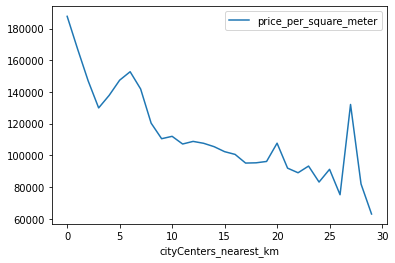

In [60]:
pivot_km_spb.plot()

**Вывод:**
1. Центром можно считать радиус в 6 км;
2. Наблюдается просадка в цене на 3-ем км в указанном радиусе. Это можно объяснить расположенным на 3-м км от Дворцовой площади таких объектов, как кладбища, промзоны, порт (непривлекательное жилье);
3. Стоимость квадратного метра жилья уменьшая с отдалением от центра города.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хорошо и плотно ты разобрал и здесь. Есть ответ на вопрос проекта + высказал предположение о зоне центра. 
</div 

### Общий вывод
1. Была сделана предобработка данных, заполнены пропуски  в зависимости от типов данных и их особенностей, удалены аномалии (например, автоматические снятия объявлений на 7, 45, 60 и др днях);
2. Были использованы сводные таблицы, гистограммы, диаграммы и другие методы, которые позволили выявить закономерности;
3. Установлено, что на стоимость квадратного метра влияют такие параметры, как количество комнат в квартире, этажность, близость к центру. Так, например, самая дорогая недвижимость в Санкт-Петербурге;
4. Отмечено,что на цены на квадратный метр также влияют день, месяц и год объявления. Было предположено, что это зависит от того, в будние или в выходные дни было выставлено объявление, для месяца - сезонность, для года - экономические процессы в стране, а также особенности самих данных;
5. Показано, что преобладающее большинство недвижимости представлено площадью между 40 и 69 кв.м., большим количеством 1-х и 2-х комнатных квартир;
6. Продажа квартир занимает занимает около 114 дней.

NB! Не производилась сегментация объявлений по классу квартир (эконом, комфорт, элит и тд), а также по износу жилого фонда из-за отсутвия данных показателей. Можно предположить, что с наличием данных показателей можно было бы объяснить дополнительно стоимость жилья, выбросы и зависимость жилья от месторасположения в Санкт Петербурге и области.



<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал идеальным дополнением проекта. Здесь очень подробно и последовательно было разобран рынок недвижимости. Теперь мы точно сможем составить антифрод-систему. 
</div 